In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('Instagram_Acc_Data.csv', header = 0)
X = df.drop(columns='fake')
y = df['fake']

# divide the dataset into training (80%) and testing (20%), 
# each have divided equally based on the label (fake and real accounts)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

Accuracy   :  0.9214285714285714
Precision  :  0.9041095890410958
Recall     :  0.9428571428571428
F1 Score   :  0.923076923076923


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

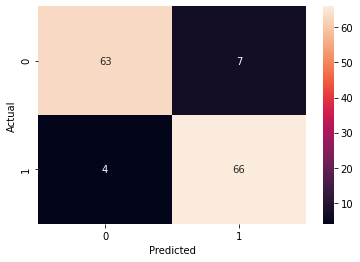

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Apply logistic regression
logistic_regression= LogisticRegression(max_iter=600)

#Train the model using the training sets
logistic_regression.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=logistic_regression.predict(X_test)

#Find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))
plt.show()

#Find confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Accuracy   :  0.9285714285714286
Precision  :  0.9166666666666666
Recall     :  0.9428571428571428
F1 Score   :  0.9295774647887323


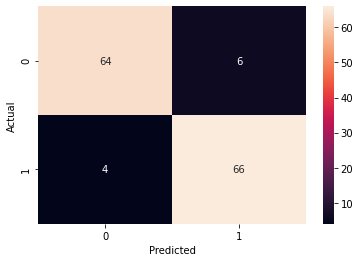

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
     
#Create a Random Forest Classifier
clf=RandomForestClassifier(random_state=1)

#Train the model using the training sets
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=clf.predict(X_test)

#Find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#Find confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.show()

## For predictive modelling, we use Logistic Regression & Random Forest Classifier
### Random Forest Classifier has higher accuracy, so we will deploy this model into WebApp

In [7]:
## Demo clf (=Random Forest Classifier)
# input features (profile pic,nums/length username,description length,external URL,#posts,#followers,#follows)
# to get prediction result
features = np.array([[0,0.51,53,0,32,1000,955]])
clf.predict(features) ##result show 1 which means fake account

array([1], dtype=int64)

In [8]:
# save the model with Pickle
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))